In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

This notebook will contain the code to plot clone maps for hte paper. 

In [2]:
import h5py
import numpy as np
from astropy.units import deg
#from lenstools import GaussianNoiseGenerator, ConvergenceMap
from scipy.ndimage import gaussian_filter

I want to study the global property of the clone dsets that I made. Specifically, 
* Power spectra
* Peak counts
* General pixel counts

I also want to see if these have any trends with cosmology, esp compared to the original maps. 

In [3]:
import healpy as hp
A = hp.nside2pixarea(1024, True)*60**2
print A

11.8025668858


In [4]:
((2.34**2)/A)*30

13.917989331446661

In [5]:
smooths = [0.0, 1.0]
noises= np.array([0.0, 0.29])
shape_noises = noises/np.sqrt((A)*30) #sigma_e/sqrt(A*n)
print shape_noises
data_mod1 = lambda x:x
data_mod2 = lambda x: gaussian_filter(x+np.random.randn(*x.shape)*shape_noises[1], smooths[1])# add a normalization, hopefully sufficient

data_mods = [[data_mod1,data_mod1, data_mod1], [data_mod2, data_mod2, data_mod1]]

[ 0.          0.01541165]


In [6]:
%%bash
ls ~/scratch/clone_maps/*DeepResnet*.hdf5 -ltr

-rw-r--r-- 1 swmclau2 risahw 68121396560 Sep 21 17:26 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v8.hdf5
-rw-r--r-- 1 swmclau2 risahw 68121396560 Sep 28 17:48 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise1.0_v6.hdf5
-rw-r--r-- 1 swmclau2 risahw 57598726904 Oct  2 17:06 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF0.0_v8.hdf5
-rw-r--r-- 1 swmclau2 risahw 59112697680 Oct  2 17:06 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF1.0_v6.hdf5
-rw-r--r-- 1 swmclau2 risahw 68121396560 Nov  2 20:58 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise1.0_v7.hdf5
-rw-r--r-- 1 swmclau2 risahw 68121396560 Nov 12 21:19 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise1.0_v8.hdf5
-rw-r--r-- 1 swmclau2 risahw 40475658784 Nov 20 11:29 /home/

In [7]:
orig_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5'
#grf_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingGRF_smooth_%0.1f_noise_0.3.hdf5'#%(smooth,shape_noise)
clone_fname = '/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise%0.1f_v8.hdf5'#%smooth
clone_fname2 = '/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF%0.1f_v8.hdf5'#%smooth

#clone_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRFNoise1.0.hdf5'

In [11]:
def plot_set(orig_fname, clone_fname, clone_fname2, boxno, idx):
    fig, axes = plt.subplots(2,3, figsize=(9,6))
    
    for smooth, shape_noise, data_mod, ax in zip(smooths,\
                                                 shape_noises,
                                                 data_mods, axes):
        for fname, a,dm in zip([orig_fname, clone_fname, clone_fname2],
                            ax, data_mod):
            
            if fname!=orig_fname:
                fname = fname%smooth
            print fname
            print '*'*10
            try:    
                with h5py.File(fname, 'r') as f:
                    X = f[boxno]['X'][idx, :].squeeze()
            except IOError:
                print 'Error loading %s'%fname
                continue
            X = dm(X)
            print X.mean(), X.std()

            X = (X-X.mean())/X.std()

            a.imshow(X)
     
    titles = ['Original', 'White Noise Clone', 'GRF Clone']
    labels = ['Noiselesss', 'Noisy']
    for i,  title in enumerate( titles):
        axes[0][i].set_title(title)
    for j, label in enumerate(labels):
        axes[j][0].set_ylabel(label)
        
    fig.tight_layout()
    plt.savefig('ex_clone_maps.pdf', format='pdf', bbox_inches='tight')
    plt.show()

    #plt.title('Original')
    #plt.title('White Noise Clone')
    #plt.title('GRF Clone')



/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5
**********
-0.000917719405588 0.00266220028179
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v8.hdf5
**********
-0.00038897 0.00294209
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF0.0_v8.hdf5
**********
-0.000369271 0.00290055
/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5
**********
-0.000898076025765 0.00495506095065
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise1.0_v8.hdf5
**********
0.00112396848328 0.00549160681286
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF1.0_v8.hdf5
**********
0.00126779 0.00767348


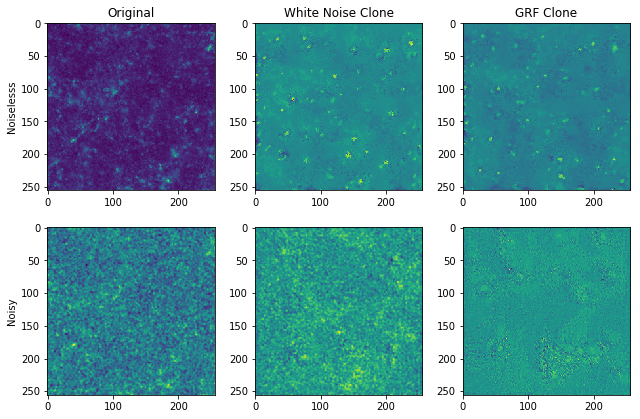

In [12]:
xt = plot_set(orig_fname, clone_fname, clone_fname2, 'Box100', 200)

In [17]:
def plot_set2(orig_fname, clone_fname, boxno, idx):
    fig, axes = plt.subplots(2,2, figsize=(6,6))
    
    for smooth, shape_noise, data_mod, ax in zip(smooths,\
                                                 shape_noises,
                                                 data_mods, axes):
        for fname, a, dm in zip([orig_fname, clone_fname],
                            ax, data_mod):
            
            if fname!=orig_fname:
                fname = fname%smooth
            print fname
            print '*'*10
            try:    
                with h5py.File(fname, 'r') as f:
                    X = f[boxno]['X'][idx, :].squeeze()
            except IOError:
                print 'Error loading %s'%fname
                continue
            X = dm(X)
            #X = (X-X.mean())/X.std()
            print X.mean(), X.std()
            a.imshow(X)
     
    titles = ['Simulation', 'Clone']
    labels = ['Noiselesss', 'Noisy']
    for i,  title in enumerate( titles):
        axes[0][i].set_title(title)
    for j, label in enumerate(labels):
        axes[j][0].set_ylabel(label)
        
    fig.tight_layout()    
    plt.show()

    #plt.title('Original')
    #plt.title('White Noise Clone')
    #plt.title('GRF Clone')



/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5
**********
-4.5284581109e-05 0.00351813813714
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v7.hdf5
**********
Error loading /scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v7.hdf5
/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5
**********
-9.20650619125e-05 0.00522459938494
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise1.0_v7.hdf5
**********
0.00140396579681 0.00585628322353


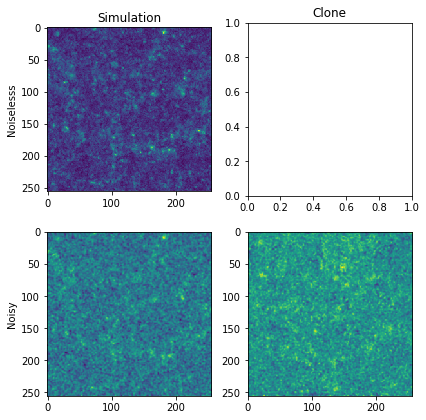

In [19]:
xt = plot_set2(orig_fname, clone_fname, 'Box130', 120)

idea: cross correlate peak locations with embedding maps 

In [12]:
with h5py.File(orig_fname, 'r') as f:
    X = f['Box111']['X'][200].squeeze()

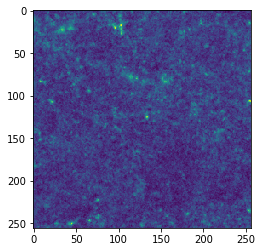

In [13]:
plt.imshow(X)